<a href="https://colab.research.google.com/github/AmanYadavKHD/Project_ZE/blob/main/CTR_Ranking_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [261]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1.Exploratory Data Analysis (EDA)**

**a. Loading and Inspecting the Data**

In [308]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/amn bhai/data.csv')
df.head()
X=df

In [263]:
df.shape

(504989, 31)

In [264]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504989 entries, 0 to 504988
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   search_term                         504989 non-null  object 
 1   product_variant_id                  504989 non-null  object 
 2   city_id                             504989 non-null  object 
 3   query_type                          504989 non-null  object 
 4   is_clicked                          504989 non-null  float64
 5   total_clicks                        504989 non-null  int64  
 6   session_views                       504989 non-null  int64  
 7   query_products_clicks_last_30_days  504989 non-null  int64  
 8   CTR_last_30_days                    504989 non-null  float64
 9   CTR_last_7_days                     504989 non-null  float64
 10  CTR_product_30_days                 504989 non-null  float64
 11  query_product_plt_clicks_6

In [265]:
df.describe()

,is_clicked,total_clicks,session_views,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,CTR_product_30_days,query_product_plt_clicks_60_days,query_product_plt_ctr_60_days,CTR_plt_30_days,...,latest_margin,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity
count,504989.000000,504989.000000,5.049890e+05,504989.000000,504989.000000,504989.000000,504989.000000,5.049890e+05,504989.000000,504989.000000,...,504989.000000,504989.000000,504989.000000,504989.000000,504989.000000,5.049890e+05,5.049890e+05,504989.000000,504989.000000,504989.000000
mean,0.302797,61.904162,1.328208e+03,21.881360,0.008795,0.007690,0.013579,4.363592e+02,0.010837,0.026300,...,57.562065,0.180289,3.993422,8.439733,670.226005,1.511799e+03,1.533943e+04,6550.765074,0.016354,0.309645
std,0.459468,1823.134651,9.122391e+03,674.481299,0.044308,0.048211,0.025096,8.662868e+03,0.046584,0.049105,...,212.396313,0.171415,2.269096,16.205789,4757.470651,1.262818e+04,9.564259e+04,34672.743645,0.027534,0.174049
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-0.125588
25%,0.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.001674,...,10.716129,0.047188,2.739761,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.002627,0.172219
50%,0.000000,0.000000,4.000000e+01,0.000000,0.000000,0.000000,0.005540,0.000000e+00,0.000000,0.009894,...,22.965769,0.137500,3.837972,0.000000,30.000000,8.000000e+01,1.074000e+03,412.000000,0.008189,0.298781
75%,1.000000,1.000000,3.990000e+02,0.000000,0.000000,0.000000,0.016021,8.000000e+00,0.003916,0.028922,...,50.624516,0.268169,5.058645,13.781775,209.000000,4.650000e+02,5.406000e+03,2460.000000,0.019178,0.434088
max,1.000000,736321.000000,1.433123e+06,267100.000000,3.000000,6.000000,1.000000,1.617229e+06,3.000000,1.000000,...,13903.490000,0.971429,28.177629,325.001848,280194.000000,1.045365e+06,3.230154e+06,961589.000000,2.000000,1.000000


In [266]:
df[df['total_clicks']==736321]
#Its look like outlier but it is not.

,search_term,product_variant_id,city_id,query_type,is_clicked,total_clicks,session_views,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,...,latest_margin,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity
114790,milk,25eb526c-9c26-48cd-95a3-8e4058910f8a,8ed26cb7-eb7d-4b7b-8d8c-3e93d5855bdd,head,1.0,736321,1433123,267100,0.528153,0.500383,...,1.573247,0.019531,0.019531,0.0,259558,876144,876167,259558,0.449855,0.524016


In [267]:
print("Unique product_variant_id:", df['product_variant_id'].nunique())
print("Unique search_term:", df['search_term'].nunique())
print("Unique city_id:", df['city_id'].nunique())

Unique product_variant_id: 30353
Unique search_term: 1997
Unique city_id: 12


**b. Check Missing Values**

In [268]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
brand_name,12.62
subcategory_name,2.18
category_name,2.18
product_name,2.18
search_term,0.00
query_product_plt_clicks_30_days,0.00
product_ctr_city_30_days,0.00
total_unique_orders_plt_30_days,0.00
product_atcs_plt_30_days,0.00
product_atcs_30_days,0.00


**c. Visualize the Data**

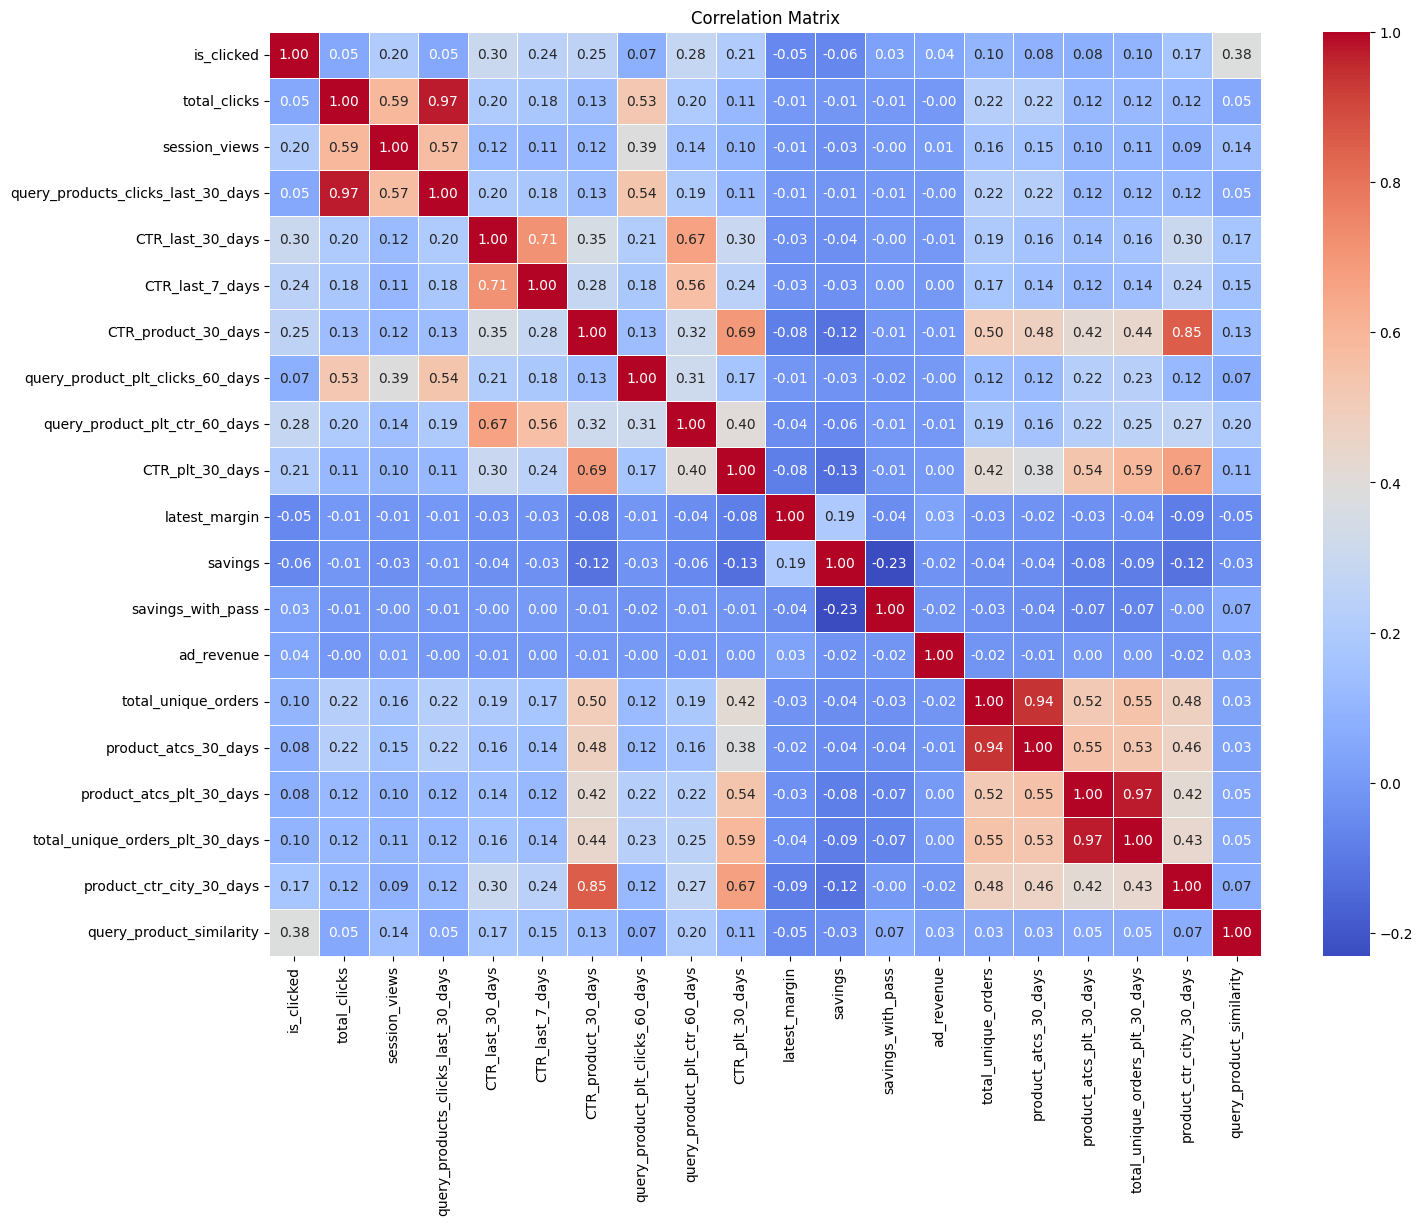

In [269]:
# Select only the numerical columns
numerical_cols = [
    'is_clicked', 'total_clicks', 'session_views', 'query_products_clicks_last_30_days',
    'CTR_last_30_days', 'CTR_last_7_days', 'CTR_product_30_days',
    'query_product_plt_clicks_60_days', 'query_product_plt_ctr_60_days',
    'CTR_plt_30_days', 'latest_margin', 'savings', 'savings_with_pass', 'ad_revenue',
    'total_unique_orders', 'product_atcs_30_days', 'product_atcs_plt_30_days',
    'total_unique_orders_plt_30_days', 'product_ctr_city_30_days', 'query_product_similarity'
]

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [270]:
classes = df_cleaned['is_clicked'].value_counts()
classes

,count
is_clicked,
0.0,342909
1.0,151061


In [271]:
not_clicked_share = round((classes[0]/df['is_clicked'].count()*100),2)
not_clicked_share

67.9

In [272]:
clicked_share = round((classes[1]/df['is_clicked'].count()*100),2)
clicked_share

29.91

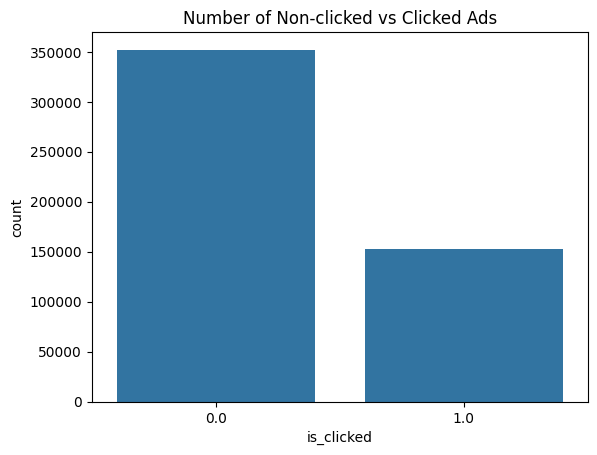

In [273]:
# Bar plot for the target variable
sns.countplot(x='is_clicked', data=df)
plt.title('Number of Non-clicked vs Clicked Ads')
plt.show()

# **2. Feature Engineering**

**a. Handle Missing Values**

In [274]:
df_cleaned = df.dropna(subset=['product_name'])

In [275]:
df_cleaned.shape

(493970, 31)

In [276]:
df_cleaned.head()

,search_term,product_variant_id,city_id,query_type,is_clicked,total_clicks,session_views,query_products_clicks_last_30_days,CTR_last_30_days,CTR_last_7_days,...,latest_margin,savings,savings_with_pass,ad_revenue,total_unique_orders,product_atcs_30_days,product_atcs_plt_30_days,total_unique_orders_plt_30_days,product_ctr_city_30_days,query_product_similarity
0,akshayakalpa milk,c442ad9b-09b6-4505-a17d-7d2b3cceee0e,ee66dc2a-aded-4445-a7b2-1ad63715725c,head,0.0,0,0,0,0.000000,0.0,...,6.900000,0.040000,2.718400,0.000000,155,376,552508,167494,0.054913,0.384844
1,ice cubes,33e1c372-8f6b-4312-b4df-93911f4c1caf,7e926d2f-adad-4e5a-956f-f07fffa54164,head,0.0,0,57,0,0.000000,0.0,...,42.010000,0.250000,5.009091,0.000000,14,41,3264,1313,0.003239,0.324977
2,protien,8ed8801e-f3bd-46ed-a212-24dcaa33d937,078d5e32-627a-4907-8df8-4360bc7c06da,head,1.0,29,545,9,0.040179,0.0,...,10.243929,0.160000,3.239500,18.622949,1469,3335,55215,24085,0.061085,0.220603
3,comb,b16224dd-5b0b-4e39-91d0-b52e563c70c2,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,head,0.0,0,13,0,0.000000,0.0,...,21.433421,0.000000,5.118421,0.000000,14567,28849,216304,121334,0.120340,0.061622
4,nail polish remover,25efac15-9a86-4da1-ab36-94e32bc7ecd9,4f30407c-6a3c-4a4e-8a3d-652217d4b6cb,tail,0.0,0,1,0,0.000000,0.0,...,13.487105,0.036957,4.915103,20.365139,1043,2446,14527,6418,0.052714,0.390254


In [277]:
print("Null counts for 'product_name':", df_cleaned['product_name'].isnull().sum())
print("Null counts for 'category_name':", df_cleaned['category_name'].isnull().sum())
print("Null counts for 'subcategory_name':", df_cleaned['subcategory_name'].isnull().sum())
print("Null counts for 'brand_name':", df_cleaned['brand_name'].isnull().sum())

Null counts for 'product_name': 0
Null counts for 'category_name': 0
Null counts for 'subcategory_name': 0
Null counts for 'brand_name': 52725


In [278]:
# Fill missing 'brand_name' values with the first 2 words of 'product_name'
def get_first_two_words(text):
    words = text.split()
    return ' '.join(words[:2])
# Identify rows where 'target_column' is null
null_rows = df_cleaned['brand_name'].isnull()
df_cleaned.loc[null_rows, 'brand_name'] = df_cleaned.loc[null_rows, 'product_name'].apply(get_first_two_words)

In [279]:
print("Null counts for 'product_name':", df_cleaned['product_name'].isnull().sum())
print("Null counts for 'category_name':", df_cleaned['category_name'].isnull().sum())
print("Null counts for 'subcategory_name':", df_cleaned['subcategory_name'].isnull().sum())
print("Null counts for 'brand_name':", df_cleaned['brand_name'].isnull().sum())

Null counts for 'product_name': 0
Null counts for 'category_name': 0
Null counts for 'subcategory_name': 0
Null counts for 'brand_name': 0


**b.Feature Transformation**

In [309]:
df=df_cleaned

In [281]:
# Create interaction features
df['search_term_city_interaction'] = df['search_term'] + '_' + df['city_id']

In [282]:
# Total clicks and views by search_term and city_id
df['total_clicks_per_search_city'] = df.groupby(['search_term', 'city_id'])['total_clicks'].transform('sum')
df['total_views_per_search_city'] = df.groupby(['search_term', 'city_id'])['session_views'].transform('sum')

# Average CTR metrics for each search_term and city_id
df['avg_ctr_last_30_days_per_search_city'] = df.groupby(['search_term', 'city_id'])['CTR_last_30_days'].transform('mean')
df['avg_ctr_last_7_days_per_search_city'] = df.groupby(['search_term', 'city_id'])['CTR_last_7_days'].transform('mean')
df['avg_ctr_product_30_days_per_search_city'] = df.groupby(['search_term', 'city_id'])['CTR_product_30_days'].transform('mean')

In [283]:
# Rolling averages for recent performance
df['rolling_avg_ctr_last_30_days'] = df.groupby(['search_term', 'city_id'])['CTR_last_30_days'].rolling(window=30, min_periods=1).mean().reset_index(level=[0,1], drop=True)
df['rolling_avg_total_clicks'] = df.groupby(['search_term', 'city_id'])['total_clicks'].rolling(window=30, min_periods=1).mean().reset_index(level=[0,1], drop=True)

In [284]:
# Product-level metrics
df['product_clicks_30_days'] = df.groupby('product_variant_id')['total_clicks'].transform('sum')
df['product_ctr_city_30_days'] = df.groupby('product_variant_id')['product_ctr_city_30_days'].transform('mean')
df['latest_margin_per_product'] = df.groupby('product_variant_id')['latest_margin'].transform('mean')
df['avg_savings_per_product'] = df.groupby('product_variant_id')['savings'].transform('mean')
df['avg_ad_revenue_per_product'] = df.groupby('product_variant_id')['ad_revenue'].transform('mean')

# **3. Model Building**

**a. Preprocessing and Cleaning Features**

In [285]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import ndcg_score, average_precision_score
from sklearn.compose import ColumnTransformer
df = df.drop(columns=['predicted_category_name', 'predicted_subcategory_name',
                       'product_name','brand_name', 'category_name', 'subcategory_name','total_clicks','session_views'
                       ,'CTR_last_30_days','CTR_last_7_days','CTR_product_30_days','latest_margin','savings','ad_revenue'])

In [286]:

# Split data into features and target
X = df.drop(columns=['is_clicked'])
y = df['is_clicked']

# Define categorical and numerical features
categorical_features = ['search_term', 'city_id', 'product_variant_id', 'query_type','search_term_city_interaction']
#categorical_features_label = ['product_variant_id', 'product_name', 'brand_name',
#                              'category_name', 'subcategory_name']
numerical_features = [col for col in X.columns if col not in categorical_features ]

# Preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])


In [287]:
categorical_features

['search_term',
 'city_id',
 'product_variant_id',
 'query_type',
 'search_term_city_interaction']

In [288]:
numerical_features

['query_products_clicks_last_30_days',
 'query_product_plt_clicks_60_days',
 'query_product_plt_ctr_60_days',
 'CTR_plt_30_days',
 'query_product_plt_clicks_30_days',
 'savings_with_pass',
 'total_unique_orders',
 'product_atcs_30_days',
 'product_atcs_plt_30_days',
 'total_unique_orders_plt_30_days',
 'product_ctr_city_30_days',
 'query_product_similarity',
 'total_clicks_per_search_city',
 'total_views_per_search_city',
 'avg_ctr_last_30_days_per_search_city',
 'avg_ctr_last_7_days_per_search_city',
 'avg_ctr_product_30_days_per_search_city',
 'rolling_avg_ctr_last_30_days',
 'rolling_avg_total_clicks',
 'product_clicks_30_days',
 'latest_margin_per_product',
 'avg_savings_per_product',
 'avg_ad_revenue_per_product']

In [289]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Group information based on 'search_term' and 'city_id'
X_train['group'] = X_train.groupby(['search_term', 'city_id']).ngroup()
X_test['group'] = X_test.groupby(['search_term', 'city_id']).ngroup()

group_train = X_train.groupby('group').size().to_list()
group_test = X_test.groupby('group').size().to_list()

# Drop 'group' column from features
X_train = X_train.drop(columns=['group'])
X_test = X_test.drop(columns=['group'])


In [290]:
X_train['product_variant_id'].nunique()

29498

**b. Dimensionality Reduction and Model Training**

In [291]:
from sklearn.decomposition import TruncatedSVD
# Preprocessing the training data and convert to sparse matrices
X_train_transformed_onehot = preprocessor.fit_transform(X_train)
X_test_transformed_onehot = preprocessor.transform(X_test)

n_components = 100
svd = TruncatedSVD(n_components=n_components)
X_train_svd = svd.fit_transform(X_train_transformed_onehot)
X_test_svd = svd.transform(X_test_transformed_onehot)


In [292]:
X_train_transformed_onehot.shape

(395176, 51726)

In [293]:
X_train_svd = pd.DataFrame(X_train_svd)
X_test_svd = pd.DataFrame(X_test_svd)

In [294]:
from xgboost import XGBRanker
# Define the model
model = XGBRanker(objective='rank:pairwise', eval_metric='ndcg')

# Train the model with group information
model.fit(X_train_svd, y_train, group=group_train)


XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None, device=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric='ndcg', feature_types=None, gamma=None, grow_policy=None,
          importance_type=None, interaction_constraints=None,
          learning_rate=None, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, multi_strategy=None, n_estimators=None,
          n_jobs=None, num_parallel_tree=None, objective='rank:pairwise', ...)

In [295]:
# Predict the relevance scores
y_pred = model.predict(X_test_svd)
y_pred

array([ 3.121345 , -1.2234826, -0.4336685, ..., -2.0198977, -2.9101815,
        2.1167703], dtype=float32)

In [331]:
from sklearn.metrics import ndcg_score, average_precision_score, mean_squared_error

# Calculate NDCG and MAP
ndcg = ndcg_score([y_test], [y_pred])
map_score = average_precision_score(y_test, y_pred)

y_pred = np.where(y_pred < 0.5, 0, 1)
# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)


# Print the metrics
print(f'NDCG: {ndcg}')
print(f'MAP: {map_score}')
print(f'MSE: {mse}')



NDCG: 0.9580139677007774
MAP: 0.6170257654768826
MSE: 0.16180132396704253


# **4.Model Prediction**

In [298]:
def preprocess_input(X_input, preprocessor, svd):
    # Transform the input data using the preprocessor
    X_transformed = preprocessor.transform(X_input)
    # Apply Truncated SVD to reduce dimensionality for sparse matrices
    X_svd = svd.transform(X_transformed)
    X_svd = pd.DataFrame(X_svd)
    return X_svd

In [306]:
def rank_products(search_term, city_id, products_df, model, preprocessor, svd):
    # Filter products based on search_term and city_id
    filtered_df = products_df[(products_df['search_term'] == search_term) & (products_df['city_id'] == city_id)]

    # Ensure the filtered dataframe is not empty
    if filtered_df.empty:
        print("No products found for the given search term and city ID.")
        return None

    # Drop irrelevant columns for prediction
    X_input = filtered_df.drop(columns=['is_clicked'])  # Assuming 'is_clicked' is not in the input features

    # Preprocess the input data
    X_input_transformed = preprocess_input(X_input, preprocessor, svd)

    # Predict relevance scores
    y_pred = model.predict(X_input_transformed)

    # Ensure the length of predictions matches the input data
    if len(y_pred) != len(filtered_df):
        raise ValueError(f"Length of values ({len(y_pred)}) does not match length of index ({len(filtered_df)})")

    # Add predictions to the dataframe
    filtered_df['predicted_score'] = y_pred

    # Rank products based on predicted scores
    ranked_products = filtered_df.sort_values(by='predicted_score', ascending=False)

    return ranked_products[['product_variant_id', 'predicted_score']]


In [328]:
# Example usage
search_term = 'body'
city_id = '8ed26cb7-eb7d-4b7b-8d8c-3e93d5855bdd'

# Assuming 'preprocessor' and 'svd' are already fitted during the training phase
ranked_products = rank_products(search_term, city_id, df, model, preprocessor, svd)

if ranked_products is not None:
    # Extract product details
    products_info = df[['product_variant_id', 'product_name', 'brand_name', 'category_name', 'subcategory_name']]

    # Merge ranked products with their details
    ranked_products_final = pd.merge(ranked_products, products_info, on='product_variant_id', how='left')

    # Select top 10 unique product names
    top_10_products = ranked_products_final.drop_duplicates(subset=['product_name']).head(10)

    # Display the top 10 product names with their predicted scores
    print(top_10_products[['product_name', 'predicted_score']])
else:
    print("No products found for the given search term and city ID.")

                                          product_name  predicted_score
0                     Dove Deeply Nourishing Body Wash         0.610937
24   Lux Body Wash Fragrant Skin Black Orchid Scent...         0.206298
76     Pears Naturale Brightening Pomegranate Bodywash         0.002128
108                        Cinthol Lime Foam Body Wash        -0.093552
126  Lux Body Wash Soft Skin French Rose & Almond O...        -0.225562
190                                 Mysore Sandal Soap        -0.239694
207  Palmolive Orange Essential Oil & Lemongrass Ar...        -0.312425
250      Be Bodywise 1% Salicylic Acid Bodywash 250 Ml        -0.808560
268  Liril Lime & Tea Tree Oil Soap (Buy 3 Get 1 Free)        -0.886272
314                                   Ramie Oval Scrub        -0.913296
